In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [18]:
# Save references to each table
Station = Base.classes.station
Measurements = Base.classes.measurement

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurements.date)).scalar()
most_recent_date

'2017-08-23'

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.
one_year = dt.datetime(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurements.date, Measurements.prcp]
precipitation_scores_query = session.query(*sel).filter(Measurements.date > one_year)
precipitation_scores = precipitation_scores_query.all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_scores, columns=['date', 'prcp'])

# Sort the dataframe by date
# df.set_index('date')
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


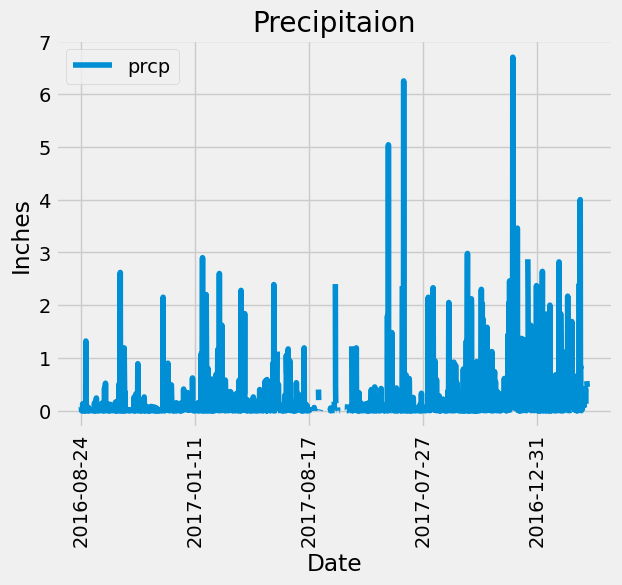

In [65]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x= "date", y= "prcp")
plt.title('Precipitaion')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = df.describe()
summary

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = session.query(Measurements.station, func.count(Measurements.station).label('station_count')).group_by(Measurements.station).order_by(func.count(Measurements.station).desc())
active_stations = query.all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_query = session.query(func.min(Measurements.tobs),
        func.max(Measurements.tobs),
        func.avg(Measurements.tobs)
    ).filter(Measurements.station == 'USC00519281')

most_active_station = most_active_station_query.all()

most_active_station

[(54.0, 85.0, 71.66378066378067)]

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_temp_query = session.query(Measurements.tobs).filter(Measurements.date > one_year).filter(Measurements.station == 'USC00519281')
one_year_temp_data = one_year_temp_query.all()
one_year_temp = pd.DataFrame(one_year_temp_data)
one_year_temp

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


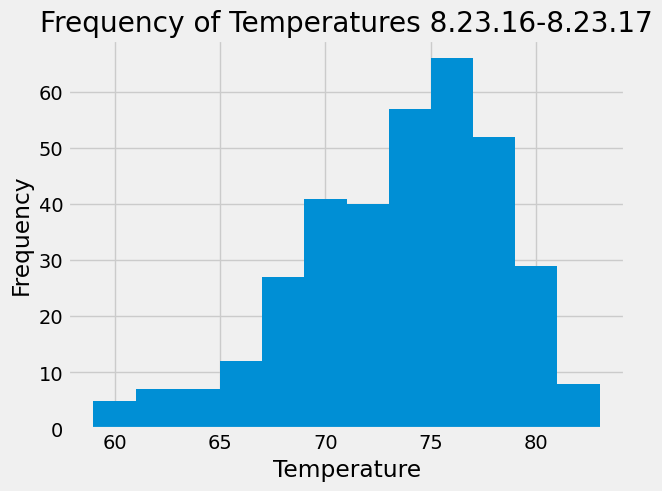

In [51]:
one_year_temp.hist(bins=12)
plt.title('Frequency of Temperatures 8.23.16-8.23.17')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.show()

# Close Session

In [62]:
# Close Session
session.close()